
# Project: Investigate a Dataset (TMDB Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The TMDb movie dataset contains information about 10,000 movies collected from the Movie Database(TMDb).This dataset  contains some specific movie inforamtion such genre, title, revenue, budget, runtime, vote count, tagline, keywords etc.
>
> These analysis aimed to answer the following question;

<li>Which genre is the most popular?</a></li>
<li>Which genre is the most popular from year to year?</a></li>
<li>What factors are associated with movies that have high revenue?</a></li>


In [78]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [79]:
#reading in the dataset into jupyter notebook
movie = pd.read_csv("tmdb-movies.csv")

In [80]:
#checking the first few rows of the dataframe
movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [81]:
#checking the number of observations and feature present in the dataset
movie.shape

(10866, 21)

In [82]:
#checking the dataset structure for the presence of null values and also check if each variable are in their 
#appropriate data type
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [83]:
#getting the statistics summary of the dataset
movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [84]:
#checking the percentage composition of null values in every columns of dataframe
movie.isnull().sum()/len(movie.index)*100

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64


### Data Cleaning (Removal of null values)

In [85]:
#Checking and Eliminating columns with more than 15% of null values
excess_columns=movie.columns[(movie.isna().sum()/len(movie.index)*100)>15]
movie=movie.loc[:,~(movie.columns.isin(excess_columns))]

In [86]:
movie.isnull().sum()/len(movie.index)*100

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
director                 0.404933
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

In [87]:
#dropping all the rows from the data that contains NA values
movie.dropna(axis=0, inplace=True)

In [88]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8665 entries, 0 to 10865
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8665 non-null   int64  
 1   imdb_id               8665 non-null   object 
 2   popularity            8665 non-null   float64
 3   budget                8665 non-null   int64  
 4   revenue               8665 non-null   int64  
 5   original_title        8665 non-null   object 
 6   cast                  8665 non-null   object 
 7   director              8665 non-null   object 
 8   keywords              8665 non-null   object 
 9   overview              8665 non-null   object 
 10  runtime               8665 non-null   int64  
 11  genres                8665 non-null   object 
 12  production_companies  8665 non-null   object 
 13  release_date          8665 non-null   object 
 14  vote_count            8665 non-null   int64  
 15  vote_average        

In [89]:
movie.isnull().sum()/len(movie.index)*100

id                      0.0
imdb_id                 0.0
popularity              0.0
budget                  0.0
revenue                 0.0
original_title          0.0
cast                    0.0
director                0.0
keywords                0.0
overview                0.0
runtime                 0.0
genres                  0.0
production_companies    0.0
release_date            0.0
vote_count              0.0
vote_average            0.0
release_year            0.0
budget_adj              0.0
revenue_adj             0.0
dtype: float64

In [90]:
#resetting the index of the cleaned dataset
movie.reset_index(inplace=True)

In [91]:
#checking the statistics summary of the cleaned dataset.
movie.describe()

,index,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,8665.000000,8665.000000,8665.000000,8.665000e+03,8.665000e+03,8665.000000,8665.000000,8665.000000,8665.000000,8.665000e+03,8.665000e+03
mean,5629.174495,57001.105713,0.741991,1.771488e+07,4.925443e+07,103.828621,264.239238,6.003347,2000.128909,2.131341e+07,6.363186e+07
std,3175.647786,86245.174062,1.087708,3.357474e+07,1.289593e+08,26.190770,635.225327,0.893593,13.221779,3.710354e+07,1.592950e+08
min,0.000000,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,2878.000000,9816.000000,0.249972,0.000000e+00,0.000000e+00,91.000000,20.000000,5.500000,1993.000000,0.000000e+00,0.000000e+00
50%,5715.000000,16219.000000,0.449397,1.500000e+06,1.858980e+05,100.000000,54.000000,6.100000,2004.000000,2.146369e+06,1.919009e+05
75%,8422.000000,54000.000000,0.843149,2.100000e+07,3.890318e+07,113.000000,200.000000,6.600000,2011.000000,2.812340e+07,5.528456e+07
max,10865.000000,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


It can be seen some variables such as movie_budeget,movie_revenueand runtime contains 0 values which is not right, giving the fact that for a movie to be released this variables must not be 0

In [92]:
#checking the proportion of the dataset that contains zero budget
(len(movie[movie['budget']==0])/len(movie))*100

45.44720138488171

In [93]:
#checking the proportion of the dataset that contains zero revenue
(len(movie[movie['revenue']==0])/len(movie))*100

47.6399307559146

In [94]:
#checking the proportion of the dataset that contains zero runtime
(len(movie[movie['runtime']==0])/len(movie))*100

0.08078476630121177

Giving the proportion of the observations that contains 0 values in revenue and budget, dropping the rows will have a significant effect on the dataset and the integrity of the result, giving the fact that this rows account for almost 50% of the whole dataset

#### Dealing with the revenue and budget 0 values

Created a function that categorise the vote_count into 4 categories, which is later use to fill in the mean revenue of each categories into the 0 values of the revenue column that fall in each categories becuase filling the 0 values of the revenue with the mean revenue might lead to overfiting

In [95]:
#craeting a function that categorise the vote_count
def cat_var1(x):
    if x <=200:
        return 'low'
    elif 200< x <= 1000:
        return 'medium'
    elif 1000 < x <= 2000:
        return 'high'
    else:
        return 'very high'

In [96]:
#applying the function to create a new column for the vote_count categories
movie['vote_count_categories'] = movie["vote_count"].apply(lambda x: cat_var1(x))

In [97]:
#getting the aggregate mean for each vote_count categories
movie.groupby('vote_count_categories').agg(Mean=('revenue',np.mean))

,Mean
vote_count_categories,
high,2.453966e+08
low,1.044584e+07
medium,9.721380e+07
very high,5.272069e+08


In [98]:
#creating a function that fill in the mean values for each rows that contain 0 value using the vote_count_catgories column
#as reference
def new_rev(cols):
    revenue=cols[0]
    vote_groupings=cols[1]
    
    if revenue==0:
        if vote_groupings =="low":
            return 1.044584e+07
        elif vote_groupings =="medium":
            return 9.721380e+07
        elif vote_groupings =="very high":
            return 5.272069e+08
        else:
            return 5.272069e+08
    else:
        return revenue

In [99]:
#applying the function to fill in mean values for 0 values of the revenue column
movie['revenue']=movie[['revenue','vote_count_categories']].apply(new_rev, axis=1)

In [100]:
movie['revenue'].describe()

count    8.665000e+03
mean     5.595094e+07
std      1.276375e+08
min      2.000000e+00
25%      1.044584e+07
50%      1.044584e+07
75%      4.398423e+07
max      2.781506e+09
Name: revenue, dtype: float64

Created a function that categorise the revenue into 3 categories, which is later use to fill in the mean budget of each categories into the 0 values of the budget column that fall in each categories becuase filling the 0 values of the budget with the mean budget might lead to overfiting

In [101]:
#craeting a function that categorise the revenue
def cat_var2(x):
    if x <=2.000000e+04:
        return 'low'
    elif 2.000000e+04< x <= 5.000000e+07:
        return 'medium'
    else:
        return 'high'

In [102]:
#applying the function to create a new column for the revenue_categories
movie['revenue_categories'] = movie["revenue"].apply(lambda x: cat_var2(x))

In [103]:
#getting the aggregate mean of budget for each revenue_categories
movie.groupby('revenue_categories').agg(Mean=('budget',np.mean))

,Mean
revenue_categories,
high,5.292041e+07
low,5.095509e+06
medium,6.905497e+06


In [104]:
#creating a function that fill in the mean budget values for each rows that contain 0 value using the revenue_categories column
#as reference
def new_budget(cols):
    budget=cols[0]
    car_revenue=cols[1]
    
    if budget==0:
        if car_revenue =="low":
            return 5.095509e+06
        elif car_revenue =="medium":
            return 6.905497e+06
        else:
            return 5.292041e+07
    else:
        return budget

In [105]:
#applying the function to fill in mean values for 0 values of the budget column
movie['budget']=movie[['budget','revenue_categories']].apply(new_budget, axis=1)

In [106]:
#checking the summary statistics of the cleaned dataset 
movie.describe()

,index,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,8665.000000,8665.000000,8665.000000,8.665000e+03,8.665000e+03,8665.000000,8665.000000,8665.000000,8665.000000,8.665000e+03,8.665000e+03
mean,5629.174495,57001.105713,0.741991,2.173557e+07,5.595094e+07,103.828621,264.239238,6.003347,2000.128909,2.131341e+07,6.363186e+07
std,3175.647786,86245.174062,1.087708,3.230423e+07,1.276375e+08,26.190770,635.225327,0.893593,13.221779,3.710354e+07,1.592950e+08
min,0.000000,5.000000,0.000188,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,2878.000000,9816.000000,0.249972,6.905497e+06,1.044584e+07,91.000000,20.000000,5.500000,1993.000000,0.000000e+00,0.000000e+00
50%,5715.000000,16219.000000,0.449397,6.905497e+06,1.044584e+07,100.000000,54.000000,6.100000,2004.000000,2.146369e+06,1.919009e+05
75%,8422.000000,54000.000000,0.843149,2.500000e+07,4.398423e+07,113.000000,200.000000,6.600000,2011.000000,2.812340e+07,5.528456e+07
max,10865.000000,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


In [107]:
#dropping some irrelevant column to the analysis
movie=movie.loc[:,~(movie.columns.isin(['budget_adj','revenue_adj','id','imdb_id']))]

In [108]:
# dropping the rows that contains 0 values in the runtime column
movie=movie[~(movie['runtime']==0)]

In [109]:
movie.describe()

,index,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,8658.000000,8658.000000,8.658000e+03,8.658000e+03,8658.000000,8658.000000,8658.000000,8658.000000
mean,5631.952529,0.742268,2.174798e+07,5.598773e+07,103.912566,264.434396,6.003858,2000.117579
std,3174.693814,1.087965,3.231432e+07,1.276825e+08,26.034344,635.444646,0.893411,13.221093
min,0.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,2881.250000,0.250189,6.905497e+06,1.044584e+07,91.000000,21.000000,5.500000,1993.000000
50%,5718.000000,0.449581,6.905497e+06,1.044584e+07,100.000000,54.000000,6.100000,2004.000000
75%,8423.750000,0.843165,2.500000e+07,4.401303e+07,113.000000,200.000000,6.600000,2011.000000
max,10865.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.700000,2015.000000


In [110]:
movie.shape

(8658, 18)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genre is the most popular genre)

In [111]:
#making a copy of the dataset for the first research question
movie_1=movie

In [112]:
#Extracting the genres
movie_1["genres"]=movie_1["genres"].str.split("|")

In [113]:
#converting each genre into a row
movie_1=movie_1.explode("genres")

In [114]:
movie_1['genres'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [115]:
movie_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22087 entries, 0 to 8664
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  22087 non-null  int64  
 1   popularity             22087 non-null  float64
 2   budget                 22087 non-null  float64
 3   revenue                22087 non-null  float64
 4   original_title         22087 non-null  object 
 5   cast                   22087 non-null  object 
 6   director               22087 non-null  object 
 7   keywords               22087 non-null  object 
 8   overview               22087 non-null  object 
 9   runtime                22087 non-null  int64  
 10  genres                 22087 non-null  object 
 11  production_companies   22087 non-null  object 
 12  release_date           22087 non-null  object 
 13  vote_count             22087 non-null  int64  
 14  vote_average           22087 non-null  float64
 15  rel

In [116]:
#getting the top 10 genre with the highest mean popularity
Top_genre=movie_1.groupby('genres').agg(Mean_popularity=('popularity',np.mean)).sort_values(by='Mean_popularity', ascending=False)[:10]
Top_genre.reset_index(inplace=True)

In [117]:
Top_genre.head()

,genres,Mean_popularity
0,Adventure,1.280414
1,Science Fiction,1.144787
2,Fantasy,1.122338
3,Action,1.031383
4,Animation,1.020778


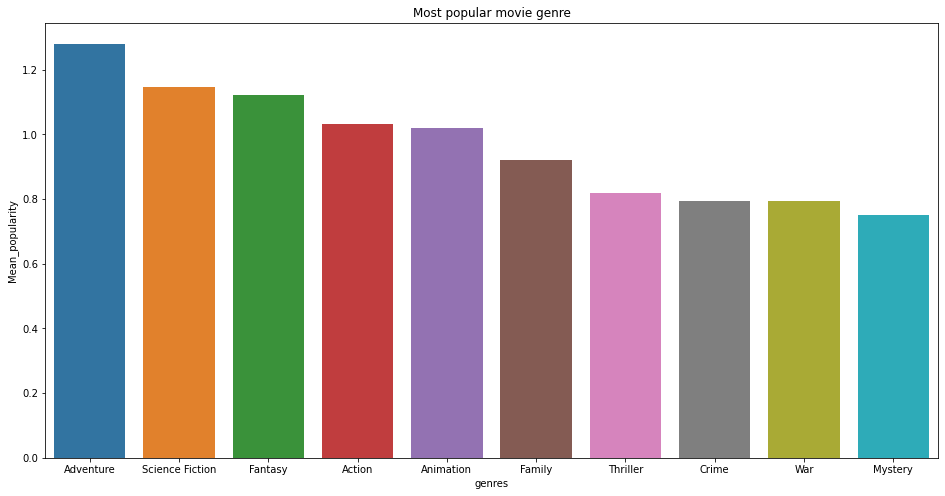

In [118]:
#chart the top10 genre with the highest mean popularity
plt.figure(figsize=(16,8))
sns.barplot(data=Top_genre,x='genres',y='Mean_popularity')
plt.title("Most popular movie genre");

Adventure has the highest mean popularity, this show Adventure genre is the most popular genre

### Research Question 2  (Which genre is the most popular genre from year to year)

In [119]:
#getting the mean popualrity for each genre and year, and assigning it to a new dataframe for further analysis
gen_1=movie_1.groupby(['genres','release_year']).agg({'popularity':'mean'})

In [120]:
#resetting the new dataframe index
gen_1=gen_1.reset_index()

In [121]:
#checking the first 10 rows of the new dataframe
gen_1.head(10)

,genres,release_year,popularity
0,Action,1960,0.647264
1,Action,1961,0.365913
2,Action,1962,0.845972
3,Action,1963,0.951729
4,Action,1964,0.813087
5,Action,1965,0.451373
6,Action,1966,0.263347
7,Action,1967,0.918499
8,Action,1968,0.365562
9,Action,1969,0.539976


In [122]:
#Getting the mean and standard deviation summary of the top 10 genres with the highest popularity throughout the release years
gen_2=gen_1.groupby(['genres']).agg(Mean=('popularity',np.mean),Std=('popularity',np.std)).sort_values(by='Mean', ascending=False)[:10]
gen_2.reset_index()

,genres,Mean,Std
0,Adventure,1.020793,0.558662
1,Animation,0.995250,0.593336
2,Fantasy,0.868514,0.525496
3,Science Fiction,0.847907,0.529380
4,Action,0.831692,0.426758
5,Family,0.789227,0.333569
6,Thriller,0.690178,0.250278
7,Crime,0.680312,0.315649
8,War,0.680307,0.353006
9,Mystery,0.610819,0.330231


The table above shows the top 10 most popular genres throughout the year with Adventure being the most popular genre througout the year with the mean popularity of 1.020 and standard deviation of 0.55, while the Thriller genre is the most popular genre year to year with mean popularity of 0.69 and standard deviation of 0.2, and this is due to the fact that thriller has the lowest standard deviation, showing the minimum deviation from the mean popularity year to year.

In [123]:
#sorting the dataframe by the standard deviation 
gen_2=gen_2.sort_values(by='Std')
gen_2.reset_index(inplace=True)

In [124]:
gen_2.head()

,genres,Mean,Std
0,Thriller,0.690178,0.250278
1,Crime,0.680312,0.315649
2,Mystery,0.610819,0.330231
3,Family,0.789227,0.333569
4,War,0.680307,0.353006


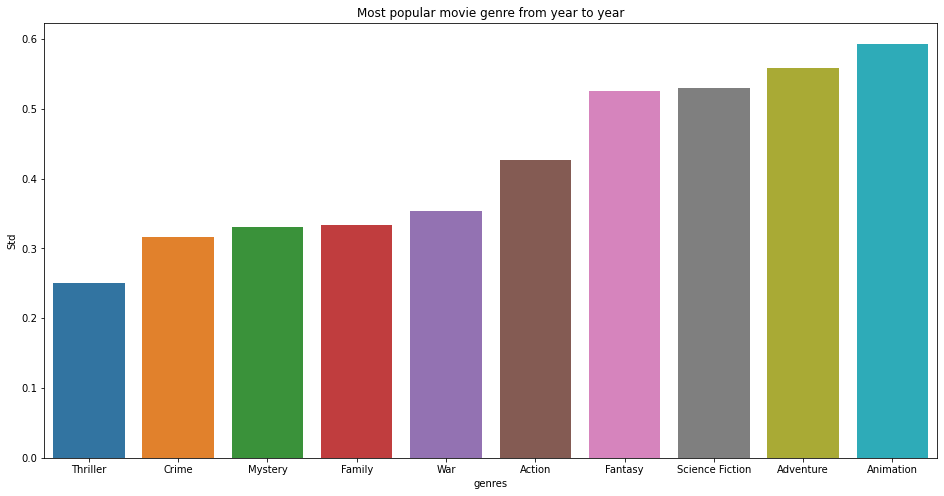

In [125]:
#chart the top10 genre with the highest mean popularity
plt.figure(figsize=(16,8))
sns.barplot(data=gen_2,x='genres',y='Std')
plt.title("Most popular movie genre from year to year");

### Research Question 3  (What factor are associated with movies that have high revenue)

In [126]:
#creating an histogram plot function
def histplot(x):
    plt.figure(figsize=(15,7))
    sns.histplot(data=movie,x=x,bins=40)
    

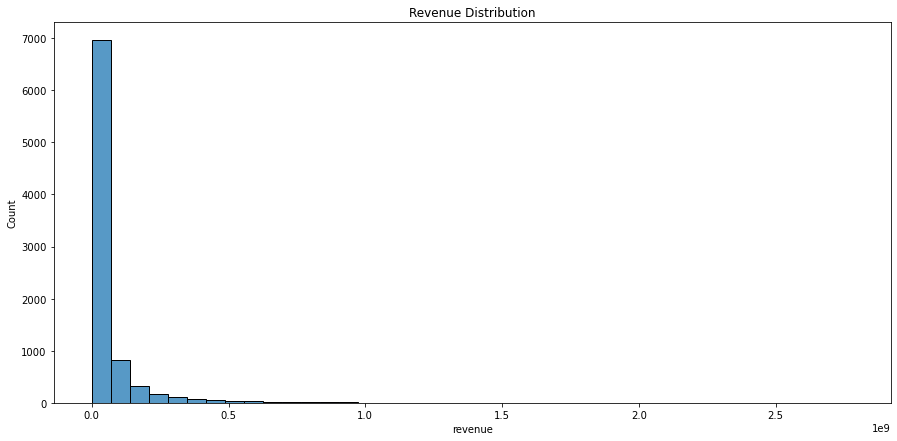

In [127]:
#checking the distribution of the revenue column
histplot("revenue")
plt.title("Revenue Distribution");

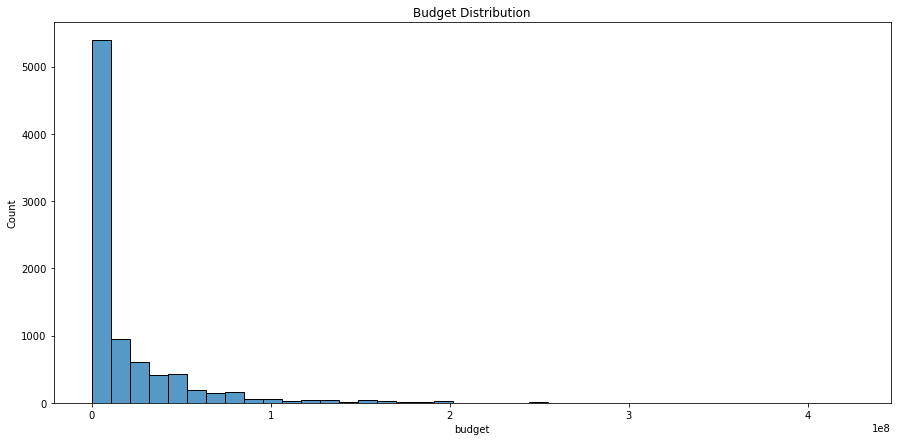

In [128]:
#checking the distribution of the budget column
histplot("budget")
plt.title("Budget Distribution");

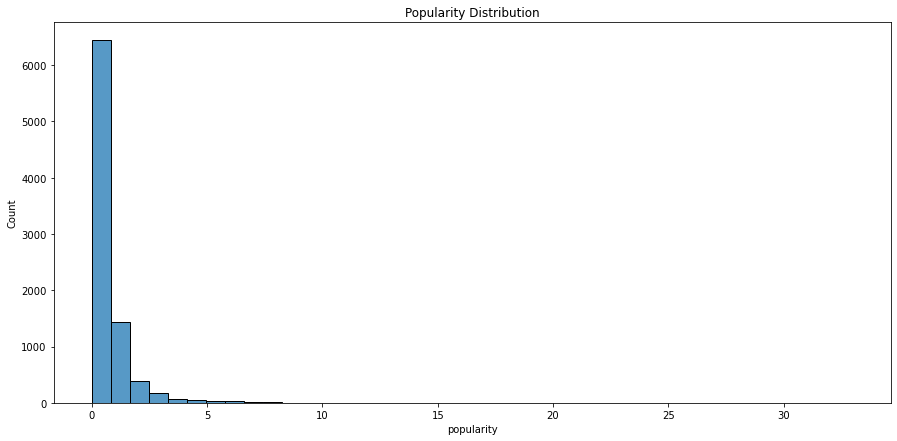

In [129]:
#checking the distribution of the popularity column
histplot("popularity")
plt.title("Popularity Distribution");

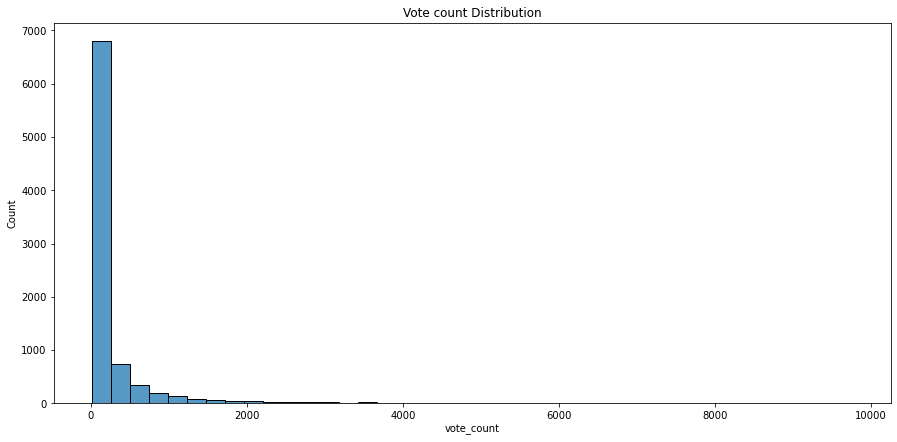

In [130]:
#checking the distribution of the vote_count column
histplot("vote_count")
plt.title("Vote count Distribution");

The distribution chart shows that the revenue, budget, popularity and vote count are positively skewed 

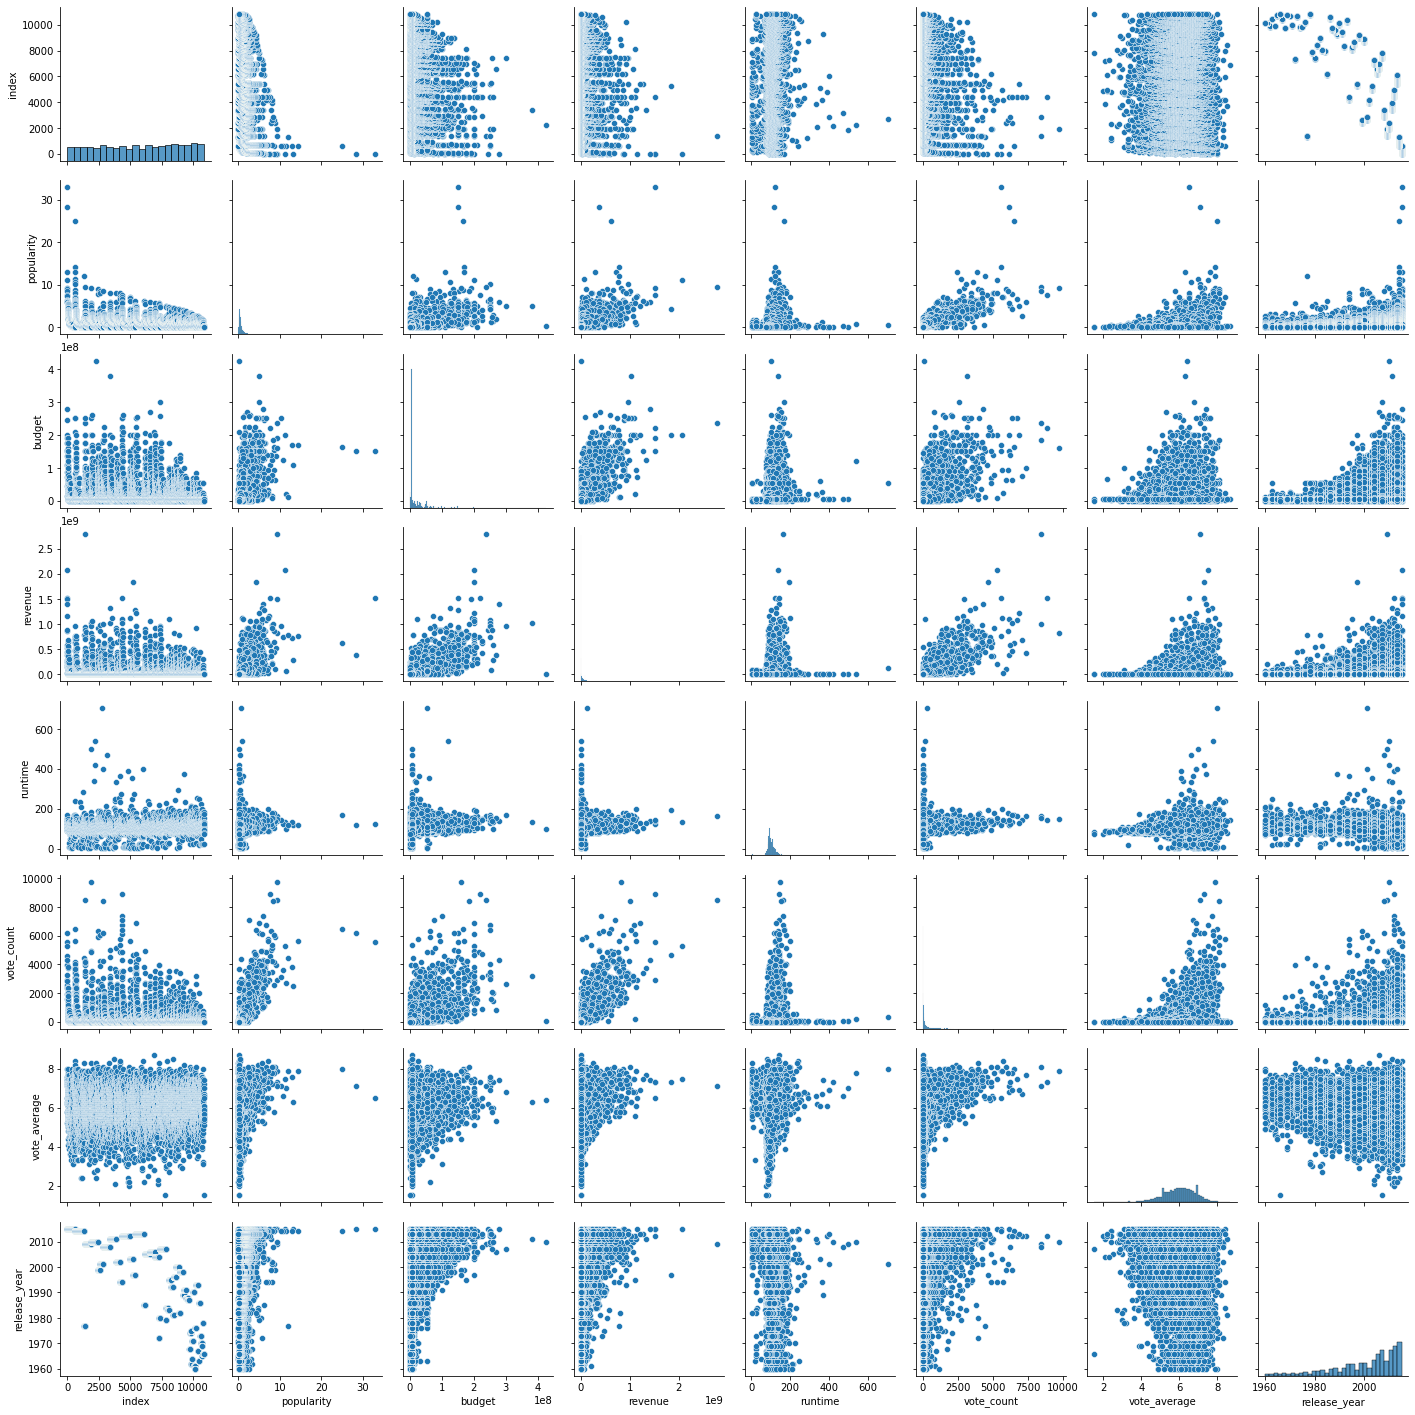

In [141]:
sns.pairplot(movie);

In [132]:
#checking the relationship between the numrical variables
movie.corr()

,index,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
index,1.000000,-0.166420,-0.124458,-0.087805,0.079446,-0.142251,0.067545,-0.728434
popularity,-0.166420,1.000000,0.523113,0.657160,0.164425,0.801511,0.244922,0.137406
budget,-0.124458,0.523113,1.000000,0.724536,0.216482,0.616569,0.093594,0.172586
revenue,-0.087805,0.657160,0.724536,1.000000,0.186418,0.785793,0.194052,0.102710
runtime,0.079446,0.164425,0.216482,0.186418,1.000000,0.197059,0.203207,-0.125283
vote_count,-0.142251,0.801511,0.616569,0.785793,0.197059,1.000000,0.288404,0.150233
vote_average,0.067545,0.244922,0.093594,0.194052,0.203207,0.288404,1.000000,-0.123816
release_year,-0.728434,0.137406,0.172586,0.102710,-0.125283,0.150233,-0.123816,1.000000


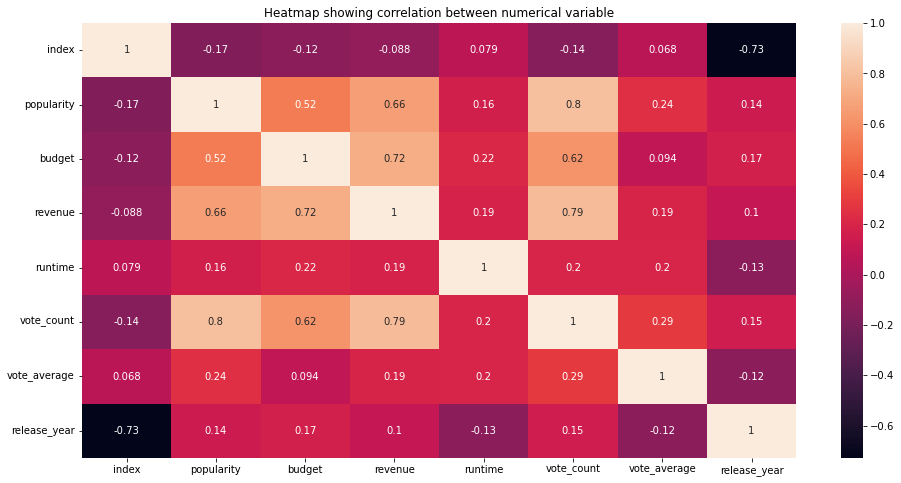

In [143]:
#Heatmap showing the relationship between the numerical variable
plt.figure(figsize=(16,8))
sns.heatmap(movie.corr(), annot=True);
plt.title("Heatmap showing correlation between numerical variable");

A heatmap showing the relationship between different numerical variables, with  value 1 indicating a perfect relationship between the variable and 0 indicating no relationship. it can be seen from the chart that budget, vote count,popularity has a strong positive relationship with revenue,which indicate that an increase or decrease in this variables tend to influence the revenue.

In [134]:
#creating a regression plot function
def regplot(x):
    plt.figure(figsize=(15,7))
    sns.regplot(data=movie,x=x,y="revenue")

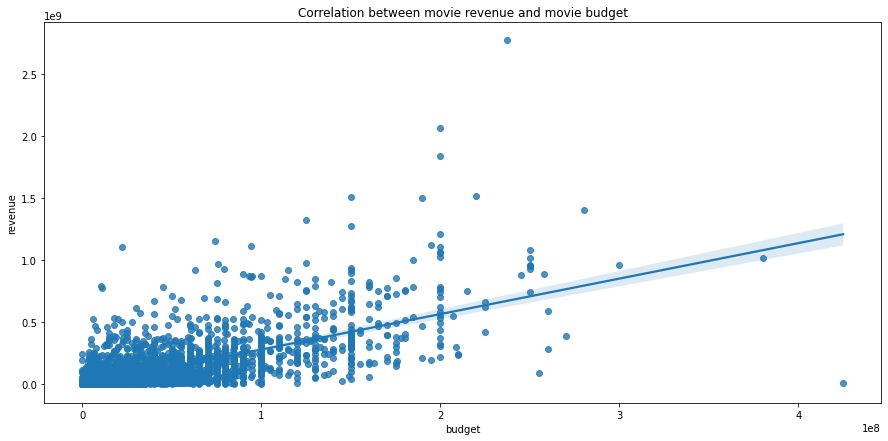

In [135]:
#regression plot showing the relatioship between budget and revenue
regplot("budget")
plt.title("Correlation between movie revenue and movie budget");

A regplot showing positive relationship between revenue and budget

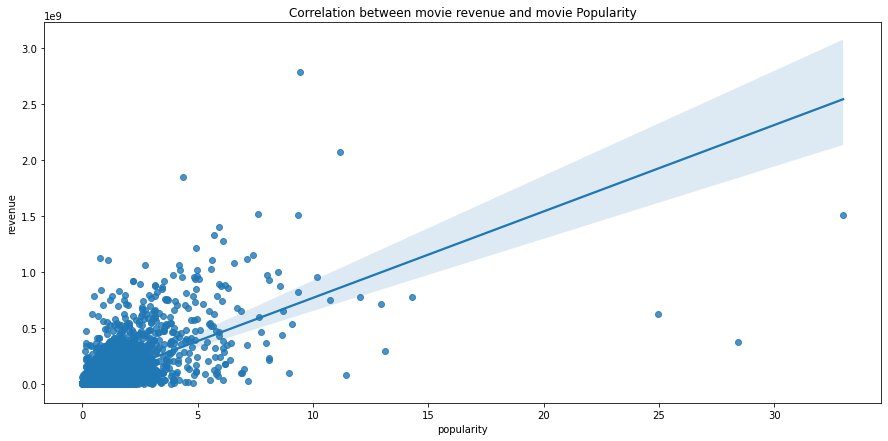

In [137]:
#regression plot showing the relatioship between budget and revenue
regplot("popularity")
plt.title("Correlation between movie revenue and movie Popularity");

A regplot showing positive relationship between revenue and popularity

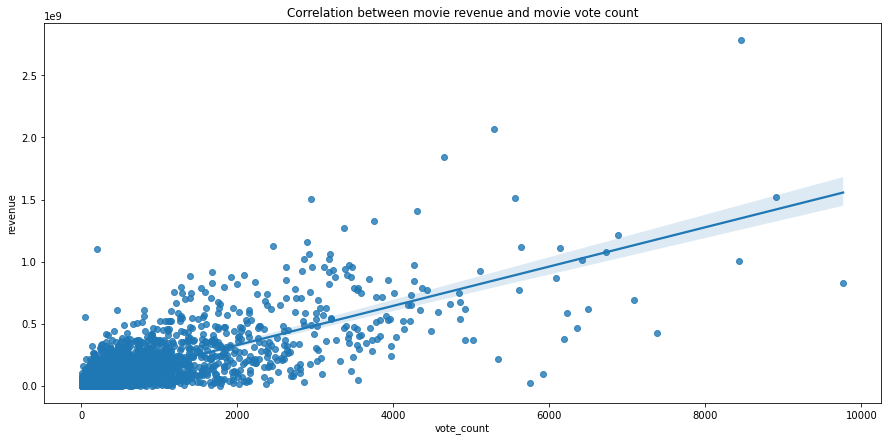

In [139]:
#regression plot showing the relatioship between vote_count and revenue
regplot("vote_count")
plt.title("Correlation between movie revenue and movie vote count");

A regplot showing positive relationship between revenue and vote_count

<a id='conclusions'></a>
## Conclusions

The following can be concluded based on the obervations made from the Analysis

Adventure movie genre is the most popular genre

Thriller genre is the most popular genre from year to year

There is a strong positive correlation between the movies revenue and movies budget, movies revenue and movies popularity, also movies revenue and vote count, which shows that movie with high revenues tend to have high budget, high popularity value and high vote count

### Limitations

Almost 50% of the revenue, budget data contains 0 value which are replace by their equivalent mean value which does not approximate to the real value, and this might introduce some error in determining the relationship between this variables and affect the integrity of our result